<a href="https://colab.research.google.com/github/oimartin/460/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import random
import pandas as pd
from statistics import stdev
from matplotlib import pyplot as plt
import seaborn as sns

# Question 1
Monte Carlo simulation: points in a circle

## Part a

In [ ]:
# determine points inside or outside the quarter circle
# r = 1
def inside_a_circle (x,y):

  # points inside the circle
  if x**2 + y**2 < 1:
    return 1
  
  # points outside the circle
  elif x**2 + y**2 >= 1:
    return 0

## Part b

In [ ]:
# func to estimate pi, standard error
def estimate_pi (N):
  
  # set up variables
  xy_points = []

  # loop through N pairs
  for i in range(0,N):
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,1)

    result = inside_a_circle(x,y)

    # update list of xy_points
    xy_points.append(result)

  # estimate of pi for N pairs 
  pi_est = 4*sum(xy_points) / len(xy_points)

  # standard error of points inside quarter circle
  standard_error = stdev(xy_points)

  # standard error of pi
  pi_se = standard_error * 4

  # confidence interval 
  ci_95 = (1.96*pi_se/ np.sqrt(len(xy_points)))

  return pi_est, pi_se, ci_95

## Part C

In [ ]:
# Prepare variable lists
N = []
pi_estimate = []
pi_standard_error = []
confidence_int_95 = []
pi_upper = []
pi_lower = []
interval = []

# iterate in increments of 500
for i in range(1000, 10500, 500):

  # add current increment to N pairs list
  N.append(i)

  # perform metrics for N pairs
  pi_est, pi_se, ci_95 = estimate_pi(i)
  pi_estimate.append(pi_est)
  pi_standard_error.append(pi_se)
  confidence_int_95.append(ci_95)

  # caclulate additional metrics for pi estimation
  pi_upper.append(pi_est + ci_95)
  pi_lower.append(pi_est - ci_95)
  interval.append(ci_95*2)

# create dictionary of lists
df = {'N': N,
      'estimate': pi_estimate,
      'se': pi_standard_error,
      'upper': pi_upper,
      'lower': pi_lower,
      'interval': interval}

# convert dictionary to df
pd.DataFrame(df)

,N,estimate,se,upper,lower,interval
0,1000,3.136000,1.646881,3.238075,3.033925,0.204149
1,1500,3.152000,1.635445,3.234765,3.069235,0.165530
2,2000,3.142000,1.642311,3.213977,3.070023,0.143955
3,2500,3.180800,1.614545,3.244090,3.117510,0.126580
4,3000,3.118667,1.658162,3.178003,3.059330,0.118673
5,3500,3.126857,1.652566,3.181607,3.072108,0.109499
6,4000,3.139000,1.644188,3.189954,3.088046,0.101908
7,4500,3.094222,1.674306,3.143142,3.045302,0.097840
8,5000,3.141600,1.642343,3.187123,3.096077,0.091047
9,5500,3.133818,1.647711,3.177365,3.090271,0.087093


## Part d

In [ ]:
pi_est_4000 = []

for i in range(0,501):
  pi_est, pi_se, ci_95 = estimate_pi(4000)
  pi_est_4000.append(pi_est)

In [ ]:
pi_est_series = pd.Series(pi_est_4000)

Text(0.5, 1.0, 'Estimating pi with 4000 points, 500 times')

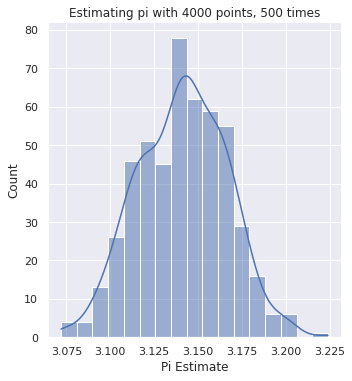

In [ ]:
sns.set_theme(style='darkgrid')
g = sns.displot(data=pi_est_series, kde=True)
g.set_axis_labels('Pi Estimate')
plt.title('Estimating pi with 4000 points, 500 times')

In [ ]:
print(f'The standard deviation is {stdev(pi_est_4000)}')

The standard deviation is 0.025112707537028312


In [ ]:
within_interval = 0

for i in pi_est_4000:
  if i <= 3.189954:
    within_interval += 1
  if i >= 3.088046:
    within_interval += 1

print(f'''There are {within_interval} pi estimates within the 95% CI interval.
{round(within_interval/len(pi_est_4000), 2)}% is the percentage of pi estimates within the 95% CI interval.''')

There are 982 pi estimates within the 95% CI interval.
1.96% is the percentage of pi estimates within the 95% CI interval.


# Question 2
Simulation: selling bikes and making bonus on bike sales

In [11]:
def bike_model (): 
  # determine number of bikes sold
  possible_bikes = [4,5,6,7,8]
  bikes_sold = random.choices(possible_bikes,
                              weights=(0.4, 0.35, 0.45, 0.15, 0.05))[0]
  bikes_sold

  # Set up variables
  day_bonus = 0
  model_A = 0
  model_B = 0
  model_C = 0
  model_D = 0

  # Determine bonus made if sold more than 4 bikes
  if bikes_sold > 4:

    # iterate over the number of bikes to determine model and bonus
    for k in range(1,bikes_sold):

      # Generate random probability to pick a bike model
      bike_type = np.random.uniform(0,1)

      # Model A Bike
      if bike_type < 0.4:
        bonus = 10
        day_bonus += bonus
        model_A += 1

      # Model B Bike
      elif bike_type < 0.75:
        bonus = 15
        day_bonus += bonus
        model_B += 1

      # Model C Bike
      elif bike_type < 0.95:
        bonus = 20
        day_bonus += bonus
        model_C += 1

      # Model D Bike
      else:
        bonus = 25
        day_bonus += bonus
        model_D += 1
  return bikes_sold, day_bonus, model_A, model_B, model_C, model_D

In [42]:
N = []
bikes_sold_iter = []
day_bonus_iter = []
model_A_iter = []
model_B_iter = []
model_C_iter = []
model_D_iter = []

for scenario in range(0,1000):
  bikes_sold, day_bonus, model_A, model_B, model_C, model_D = bike_model()
  N.append(scenario)
  bikes_sold_iter.append(bikes_sold)
  day_bonus_iter.append(day_bonus)
  model_A_iter.append(model_A)
  model_B_iter.append(model_B)
  model_C_iter.append(model_C)
  model_D_iter.append(model_D)

# create dictionary of lists
bikes_iter = {'N': N,
      'bikes_sold': bikes_sold_iter,
      'day_bonus': day_bonus_iter,
      'model_A': model_A_iter,
      'model_B': model_B_iter,
      'model_C': model_C_iter,
      'model_D': model_D_iter}

total_bikes_sold = sum(df.model_A) + sum(df.model_B) + sum(df.model_C) + sum(df.model_D)

# convert dictionary to df
df = pd.DataFrame(bikes_iter)
print(f'''total model_A sold: {sum(df.model_A)} ({sum(df.model_A)/total_bikes_sold})
total model_B sold: {sum(df.model_B)} ({(sum(df.model_B)/total_bikes_sold)})
total model_C sold: {sum(df.model_C)} ({sum(df.model_C)/total_bikes_sold})
total model_D sold: {sum(df.model_D)} ({sum(df.model_D)/total_bikes_sold})''')
display(df.describe())
display(df)


total model_A sold: 1410 (0.4052888761138258)
total model_B sold: 1202 (0.34550158091405575)
total model_C sold: 738 (0.2121299223914918)
total model_D sold: 176 (0.05058924978442081)


,N,bikes_sold,day_bonus,model_A,model_B,model_C,model_D
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,5.378000,51.290000,1.410000,1.202000,0.738000,0.176000
std,288.819436,1.130661,35.022314,1.321229,1.176682,0.918804,0.418568
min,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249.750000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,499.500000,5.000000,60.000000,1.000000,1.000000,0.000000,0.000000
75%,749.250000,6.000000,75.000000,2.000000,2.000000,1.000000,0.000000
max,999.000000,8.000000,130.000000,7.000000,6.000000,5.000000,2.000000


,N,bikes_sold,day_bonus,model_A,model_B,model_C,model_D
0,0,5,65,2,0,1,1
1,1,6,85,2,0,2,1
2,2,7,75,3,3,0,0
3,3,5,60,1,2,1,0
4,4,4,0,0,0,0,0
...,...,...,...,...,...,...,...
995,995,6,60,3,2,0,0
996,996,5,75,0,2,1,1
997,997,5,60,1,2,1,0
998,998,7,85,2,3,1,0


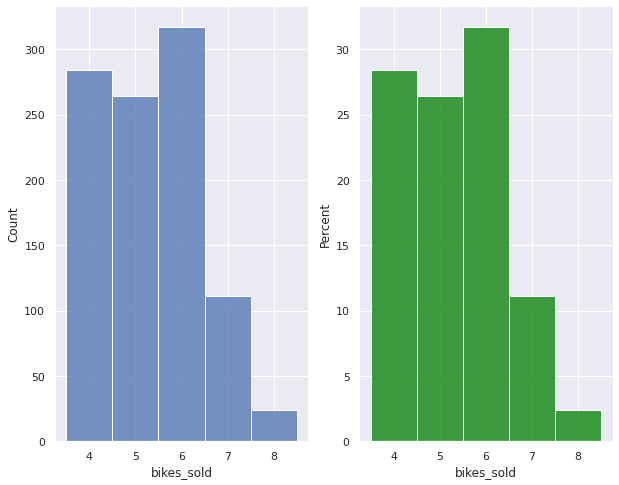

In [34]:
sns.set_theme(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
sns.histplot(data=df, x='bikes_sold',discrete=True, ax=ax1)
sns.histplot(data=df, x='bikes_sold',stat="percent", ax=ax2, discrete=True, color='green')

# Question 4
simulated annealing

In [165]:
def solution(pack, values, sizes, max_size):
  # total value and size of a pack
  v = 0.0
  s = 0.0
  n = len(pack)

  for i in range(n):
    if pack[i]==1:
      v += values[i]
      s += sizes[i]

  if s > max_size:
    v = 0.0

  return (v, s)

def near_by(pack, rnd):
  n = len(pack)
  result = np.copy(pack)
  i = rnd.randint(n)

  if result[i] == 0:
    result[i] = 1

  elif result[i] == 1:
    result[i] = 0

  return result

def solve(n_items, rnd, values, sizes, max_size, max_iter, start_temperature, alpha):
  # solve using simulated annealing
  curr_temperature = start_temperature
  curr_pack = np.ones(n_items, dtype=np.int64)
  print(f'''Initial guess:
  {curr_pack}
  alpha used {alpha}
  max iteration used {max_iter}
  ''')

  (curr_value, curr_size) = solution(curr_pack, values, sizes, max_size)
  iteration = 0
  interval = (int)(max_iter/4)
 
  while iteration < max_iter:
    # pct_iters_left = (max_iter - iteration) / (max_iter*1.0)
    adj_pack = near_by(curr_pack, rnd)
    (adj_v, _) = solution(adj_pack, values, sizes, max_size)
   
    if adj_v > curr_value:  # better so accept near by 
      curr_packing = adj_pack
      curr_value = adj_v
   
    else:          # near by  packing is worse
      accept_p = np.exp( (adj_v - curr_value ) / curr_temperature )
      p = rnd.random()
      
      if p < accept_p:  # accept worse packing anyway
        curr_pack = adj_pack
        curr_value = adj_v
      # else don't accept
    
    if iteration % interval == 0:
      print(f"iter = {iteration} : curr value = {curr_value} : curr temp = {curr_temperature}")
    
    if curr_temperature < 0.00001:
      curr_temperature = 0.00001
    
    else:
      curr_temperature *= alpha
      # curr_temperature = start_temperature * pct_iters_left * 0.0050
    iteration += 1
  
  return curr_packing

def main():
  print(f'''Begin knapsack simulated annealing demo
Goal is to maximize value subject to max size constraint''')

  values = np.array([12,16,22,8])
  sizes = np.array([4,5,7,3])
  max_size = 14
  
  print(f'''
**************************************************
  Item values:
  {values}

  Item sizes:
  {sizes}

  Max total size = {max_size}

**************************************************''')

  rnd = np.random.RandomState(5)
  max_iter = [50, 100, 500, 1000]
  start_temperature = 10000.0
  alpha = [0.9,0.91, 0.92,0.93,0.94,0.95]
 
  print(f'''Settings:
  max_iter = {max_iter}
  start_temperature = {start_temperature}
  alpha = {alpha}
  ''')

  print(f"******************Comparing Alphas and Max Iterations*********************")
  for a in alpha:
    for i in max_iter:
      pack = solve(4, rnd, values, sizes,max_size, 
                i, start_temperature, a)
      
      (v,s) = solution(pack, values, sizes, max_size)
      print(f'''
      Total value of packing = {v}
      Total size  of packing = {s}
**********************************************************************''')

In [166]:
main()

Begin knapsack simulated annealing demo
Goal is to maximize value subject to max size constraint

**************************************************
  Item values:
  [12 16 22  8]

  Item sizes:
  [4 5 7 3]

  Max total size = 14

**************************************************
Settings:
  max_iter = [50, 100, 500, 1000]
  start_temperature = 10000.0
  alpha = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95]
  
******************Comparing Alphas and Max Iterations*********************
Initial guess:
  [1 1 1 1]
  alpha used 0.9
  max iteration used 50
  
iter = 0 : curr value = 0.0 : curr temp = 10000.0
iter = 12 : curr value = 0.0 : curr temp = 2824.2953648100006
iter = 24 : curr value = 0.0 : curr temp = 797.6644307687257
iter = 36 : curr value = 22.0 : curr temp = 225.28399544939197
iter = 48 : curr value = 38.0 : curr temp = 63.626854411359496

      Total value of packing = 38.0
      Total size  of packing = 12.0
**********************************************************************
Initia